In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Preference is: 7.464671543749822


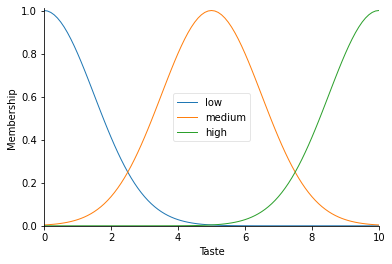

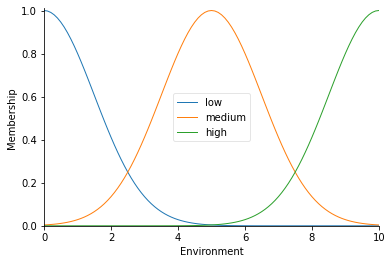

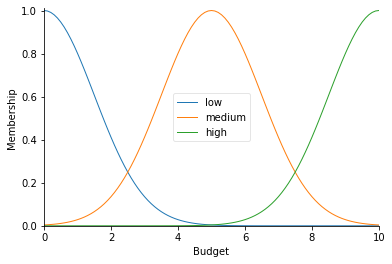

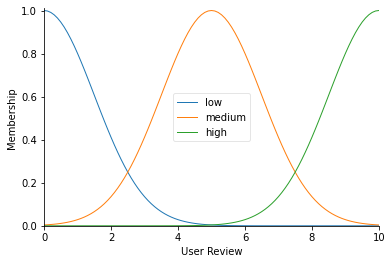

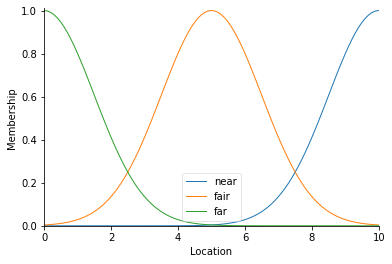

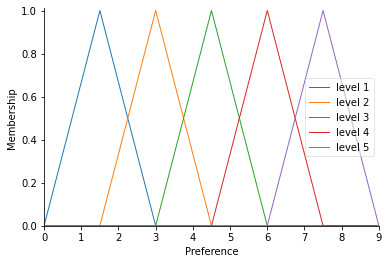

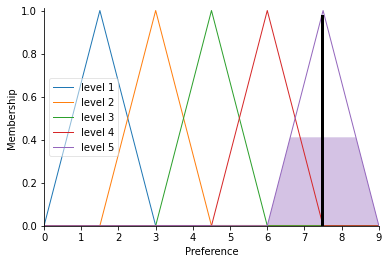

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#input
taste = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Taste')
environment = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Environment')
budget = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Budget')
user_review = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'User Review')
location = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Location')

#output
preference = ctrl.Consequent(np.arange(0, 9.1, 0.1), 'Preference')

#create func
#taste
taste['low'] = fuzz.gaussmf(taste.universe, 0, 1.5)
taste['medium'] = fuzz.gaussmf(taste.universe, 5, 1.5)
taste['high'] = fuzz.gaussmf(taste.universe, 10, 1.5)

#enviroment
environment['low'] = fuzz.gaussmf(environment.universe, 0, 1.5)
environment['medium'] = fuzz.gaussmf(environment.universe, 5, 1.5)
environment['high'] = fuzz.gaussmf(environment.universe, 10, 1.5)

#budget
budget['low'] = fuzz.gaussmf(budget.universe, 0, 1.5)
budget['medium'] = fuzz.gaussmf(budget.universe, 5, 1.5)
budget['high'] = fuzz.gaussmf(budget.universe, 10, 1.5)

#user review
user_review['low'] = fuzz.gaussmf(user_review.universe, 0, 1.5)
user_review['medium'] = fuzz.gaussmf(user_review.universe, 5, 1.5)
user_review['high'] = fuzz.gaussmf(user_review.universe, 10, 1.5)

#location
location['near'] = fuzz.gaussmf(location.universe, 10, 1.5)
location['fair'] = fuzz.gaussmf(location.universe, 5, 1.5)
location['far'] = fuzz.gaussmf(location.universe, 0, 1.5)

#preference
preference['level 1'] = fuzz.trimf(preference.universe, [0, 1.5, 3])
preference['level 2'] = fuzz.trimf(preference.universe, [1.5, 3, 4.5])
preference['level 3'] = fuzz.trimf(preference.universe, [3, 4.5, 6])
preference['level 4'] = fuzz.trimf(preference.universe, [4.5, 6, 7.5])
preference['level 5'] = fuzz.trimf(preference.universe, [6, 7.5, 9])

#rule
rule1 = ctrl.Rule(taste['low'] & environment['low'] & budget['high'] & user_review['low'] & location['far'], preference['level 1'])
rule2 = ctrl.Rule(taste['low'] & environment['medium'] & budget['medium'] & user_review['medium'] & location['fair'], preference['level 3'])
rule3 = ctrl.Rule(taste['low'] & environment['high'] & budget['low'] & user_review['high'] & location['near'], preference['level 4'])
rule4 = ctrl.Rule(taste['low'] & environment['medium'] & budget['high'] & user_review['medium'] & location['fair'], preference['level 2'])
rule5 = ctrl.Rule(taste['medium'] & environment['low'] & budget['high'] & user_review['low'] & location['far'], preference['level 1'])
rule6 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['medium'] & user_review['medium'] & location['fair'], preference['level 3'])
rule7 = ctrl.Rule(taste['medium'] & environment['high'] & budget['low'] & user_review['high'] & location['near'], preference['level 5'])
rule8 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['high'] & user_review['medium'] & location['fair'], preference['level 4'])
rule9 = ctrl.Rule(taste['high'] & environment['low'] & budget['high'] & user_review['low'] & location['far'], preference['level 2'])
rule10 = ctrl.Rule(taste['high'] & environment['medium'] & budget['medium'] & user_review['medium'] & location['fair'], preference['level 4'])
rule11 = ctrl.Rule(taste['high'] & environment['high'] & budget['low'] & user_review['high'] & location['near'], preference['level 5'])
rule12 = ctrl.Rule(taste['high'] & environment['medium'] & budget['high'] & user_review['medium'] & location['fair'], preference['level 5'])

#view graph
taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

#enter input
rating_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
rating = ctrl.ControlSystemSimulation(rating_ctrl)
rating.input['Taste'] = 8
rating.input['Environment'] = 8
rating.input['Budget'] = 2
rating.input['User Review'] = 9
rating.input['Location'] = 10

#compute
rating.compute()
print('Preference is:',rating.output['Preference'])
preference.view(sim=rating)